#### Task 1.1: Data Understanding

Explore the incidents dataset using analytical tools and write a concise "data understanding" report that assesses data quality, the distribution of variables, and pairwise correlations.

Subtasks of Data Understanding:

- Data semantics for each feature not described above and the new ones defined by the team
- Distribution of the variables and statistics
- Assessing data quality (missing values, outliers, duplicated records, errors)
- Variables transformations
- Pairwise correlations and eventual elimination of redundant variables

Nice visualization and insights can be obtained by exploiting the latitude and longitude features ([example](https://plotly.com/python/getting-started/)).

For this task we followed the following check structure [#WIP]():
1. [] Type of data
2. [x] Type of attribute
3. [] Data Quality
4. [ ] Outliers detection and manipulation
5. [ ] Correlation analysis


#### Task 1.2: Data Preparation

Improve the quality of your data and prepare it by extracting new features interesting for describing the incidents. Some examples of indicators to be computed are:

- How many males are involved in incidents relative to the total number of males for the same city and in the same period?
- How many injured and killed people have been involved relative to the total injured and killed people in the same congressional district in a given period of time?
- Ratio of the number of killed people in the incidents relative to the number of participants in the incident
- Ratio of unharmed people in the incidents relative to the average of unharmed people in the same period

Note that these examples are not mandatory, and teams can define their own indicators. Each indicator must be correlated with a description and, when necessary, its mathematical formulation. The extracted variables will be useful for the clustering analysis in the second project's task. Once the set of indicators is computed, the team should explore the new features for a statistical analysis, including distributions, outliers, visualizations, and correlations.

See the corresponding Notebook in [Task 1.2 - Data Preparation](Task1_Data_Preparation.ipynb).




# Task 1.1 - Data Understanding

We have to do some data understanding, so we're gonna explore the dataset. We can start with a simple analysis that establish the variable inside our dataset and visualize a bunch of their distibution, type, etc...

In [1]:
# This will take a while
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import plotly.offline as py


# Set a seed for reproducibility
np.random.seed(42)

#### Dataset Structure

Let's breakdown the first, larger dataset `incidents.csv` by describing briefly the general structure:
- 28 Columns features: Some categorical like `date`, `state` etc... Others are numerical like `n_participants, n_males` despite the type must be still checked. 
- Textual features like `notes`, `incident_characteristics1` and `incident_characteristics2` will be firstly analyzed but, at first look, are not much useful when combined with other dataset as the information reported are fragmented/incorrect/ambiguous. 

Let's import all the three dataset, starting to analyze first the larger one:

In [2]:
# Import the datasets

# Gun incidents data
df_incidents = pd.read_csv('../source/ds/incidents.csv')

# Poverty by state and year
df_poverty = pd.read_csv('../source/ds/povertyByStateYear.csv')

# Year-state-district-house
df_ysdh = pd.read_csv('../source/ds/year_state_district_house.csv')


# Visualize data table
df_incidents.head(20)


/tmp/ipykernel_52897/2572660480.py:4: DtypeWarning:

Columns (15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.



,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2
0,2015-05-02,Indiana,Indianapolis,Lafayette Road and Pike Plaza,39.8322,-86.2492,7.0,94.0,33.0,19.0,...,1.0,0.0,0,1,0.0,0.0,1.0,Teen wounded while walking - Security guard at...,Shot - Wounded/Injured,NaN
1,2017-04-03,Pennsylvania,Kane,5647 US 6,41.6645,-78.7856,5.0,NaN,NaN,62.0,...,1.0,0.0,1,0,0.0,0.0,1.0,shot self after accident,"Shot - Dead (murder, accidental, suicide)",Suicide^
2,2016-11-05,Michigan,Detroit,6200 Block of East McNichols Road,42.4190,-83.0393,14.0,4.0,2.0,NaN,...,NaN,NaN,0,1,0.0,1.0,2.0,1 inj.,Shot - Wounded/Injured,NaN
3,2016-10-15,District of Columbia,Washington,"1000 block of Bladensburg Road, NE",38.9030,-76.9820,1.0,NaN,NaN,NaN,...,1.0,0.0,0,1,0.0,0.0,2.0,NaN,Shot - Wounded/Injured,NaN
4,2030-06-14,Pennsylvania,Pittsburgh,California and Marshall Avenues,40.4621,-80.0308,14.0,NaN,NaN,NaN,...,1.0,0.0,0,1,0.0,1.0,2.0,NaN,Shot - Wounded/Injured,"Drive-by (car to street, car to car)"
5,2014-01-18,North Carolina,Wayne County,4700 block of U.S. Highway 70 East,35.1847,-77.9527,13.0,4.0,7.0,65.0,...,1.0,0.0,0,1,0.0,0.0,1.0,NaN,Shot - Wounded/Injured,Home Invasion
6,2018-01-25,Louisiana,Zachary,18733 Samuels Rd,30.6069,-91.2270,6.0,63.0,15.0,30.0,...,5.0,0.0,2,1,2.0,0.0,5.0,Good Samaritan shot aggressors - was arrested ...,Shot - Wounded/Injured,"Shot - Dead (murder, accidental, suicide)"
7,2016-03-16,Connecticut,New Haven,560 Ella T Grasso Boulevard,41.2945,-72.9457,3.0,116.0,10.0,NaN,...,1.0,0.0,0,0,1.0,0.0,1.0,"student hid Ruger 357 gun in coat, no shots fired",Institution/Group/Business,Non-Shooting Incident
8,2016-08-01,Virginia,Stafford,Cool Springs Road and North Kings Highway,38.3008,-77.4469,1.0,28.0,28.0,65.0,...,1.0,0.0,1,0,0.0,0.0,1.0,"car crash, suspect holding handgun, officers s...","Shot - Dead (murder, accidental, suicide)",Officer Involved Incident
9,2015-03-22,Oklahoma,Tulsa,12500 block of East 52nd Street,36.1060,-96.0764,1.0,66.0,37.0,20.0,...,0.0,1.0,0,1,0.0,0.0,1.0,Super 8 Motel,Shot - Wounded/Injured,Accidental Shooting


At first look there are values whose the type is not matching or is ambiguous, so we delve deeper into this aspect:

In [3]:
print("--"*50)
df_poverty.info()
print("--"*50)
df_ysdh.info()
print("--"*50)
df_incidents.info()

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              884 non-null    object 
 1   year               884 non-null    int64  
 2   povertyPercentage  832 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.8+ KB
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    10441 non-null  int64 
 1   state                   10441 non-null  object
 2   congressional_district  10441 non-null  int64 
 3   party             

The `info` highlight many mismatch between the expected type and the actual type that will be managed in later sections.

## 1. Data Quality [#WIP]()
In this section we evaluate the following:
- **Syntacic accuracy**: if the domain value of the attributes is respected
- **Semantic accuracy**: correct attribute value
- **Completeness**: if the samples cover the all the possible value of the attribute
- **Unbalanced data**: understand if all the record represents all the possible scenarios the dataset want describe, equally
- **Timeliness**: understand if data are coherent respect to the timeframe considered

It's necessary to highlight also the importance of __eliminate duplicate data, plot the histogram visualization for frequency distribution and measure the central tendency (_AAD,MAD_)__. 


In [4]:
df_incidents.describe()

,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants
count,231754.000000,231754.000000,227733.000000,200905.000000,207342.00000,147379.000000,203315.000000,203315.000000,239677.000000,239677.000000,212051.000000,212051.000000,239677.000000
mean,37.546598,-89.338348,8.001265,55.447132,20.47711,30.295707,1.520252,0.212340,0.252290,0.494007,0.468439,0.494169,1.636895
std,5.130763,14.359546,8.480835,42.048117,14.20456,13.363592,0.996767,0.490888,0.521779,0.729952,0.851035,0.925566,1.252514
min,19.111400,-171.429000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.903400,-94.158725,2.000000,21.000000,9.00000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,38.570600,-86.249600,5.000000,47.000000,19.00000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,41.437375,-80.048625,10.000000,84.000000,30.00000,37.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,71.336800,97.433100,53.000000,901.000000,94.00000,311.000000,61.000000,23.000000,50.000000,53.000000,63.000000,20.000000,103.000000


The `describe` return basic statistics for numerical attributes: at first look, are missing multiple attributes because some of the expected numerical attributes are of type `object`. Also, most of the attributes shown are `float64` despite the expected numerical range is an `int64`. 

Aside from that, still without much pre-processing we can understand that:
- `congressional_district`: the min and max value return a correct domain for the attribute as the state with most congressional district is the state of California.
- `state_house_district`: the min and max value shows an _incorrect_ domain as the state with most state house district is the New Hampshire with 400 district, not 901.
- `state_senate_district`: the min and max value shows an _incorrect_ domain as the state with most state senate district is the Minnesota with 67 district, not 94.
- `partecipant_age1`:  the max age shows the presence of noise data with age over 300.


####  1.1 Data Conversions

All of the following attributes are `object` or `float64` so we convert them to `int64`:

In [5]:
# - avg_age_participants, min_age_participants, max_age_participants, n_participant_child, n_participant_teen, n_participant_adult: are all object time, convert them to int
columns_to_convert = [
    'min_age_participants',
    'avg_age_participants',
    'max_age_participants',
    'n_participants_child',
    'n_participants_teen',
    'n_participants_adult'
]

district_to_int = ['state_house_district', 'state_senate_district', 'congressional_district']

# Convert non-numeric values to NaN
df_incidents[columns_to_convert] = df_incidents[columns_to_convert].apply(pd.to_numeric, errors='coerce')

for column in district_to_int:
    df_incidents[column] = df_incidents[column].fillna(0).astype(int)
    
# Fill NaN values with 0
df_incidents[columns_to_convert] = df_incidents[columns_to_convert].fillna(0).astype(int)


df_incidents.dtypes
df_incidents.describe()

,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants
count,231754.000000,231754.000000,239677.000000,239677.000000,239677.000000,147379.000000,2.396770e+05,2.396770e+05,2.396770e+05,239677.000000,239677.000000,239677.000000,203315.000000,203315.000000,239677.000000,239677.000000,212051.000000,212051.000000,239677.000000
mean,37.546598,-89.338348,7.602532,46.477576,17.714528,30.295707,3.767312e+06,1.624494e+04,1.242133e+04,13.289519,6.975338,15.263233,1.520252,0.212340,0.252290,0.494007,0.468439,0.494169,1.636895
std,5.130763,14.359546,8.448175,43.576547,14.949467,13.363592,1.838355e+09,1.792441e+06,8.774425e+04,2991.328168,2019.152261,2935.067922,0.996767,0.490888,0.521779,0.729952,0.851035,0.925566,1.252514
min,19.111400,-171.429000,0.000000,0.000000,0.000000,0.000000,-1.000000e+03,-1.000000e+03,-1.000000e+03,-977.000000,-947.000000,-991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.903400,-94.158725,2.000000,9.000000,5.000000,21.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,38.570600,-86.249600,5.000000,35.000000,15.000000,27.000000,1.900000e+01,2.100000e+01,2.100000e+01,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,41.437375,-80.048625,10.000000,77.000000,29.000000,37.000000,2.900000e+01,3.100000e+01,3.300000e+01,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,71.336800,97.433100,53.000000,901.000000,94.000000,311.000000,9.000000e+11,8.719163e+08,8.300000e+06,886365.000000,762487.000000,827900.000000,61.000000,23.000000,50.000000,53.000000,63.000000,20.000000,103.000000


In [6]:
df_incidents.shape[0]


239677

The type conversion shows all the expected numerical column, highlighting that:
- `min_age_partecipants`: shows noise data with age -1000 and max age over 8 billion. Similar behaviour is inevitably also found for attributes `avg_age_partecipants, max_age_partecipants`
- `n_partecipants_child`,`n_partecipants_teen` and `n_participants_adult`: min value cannot be negative and max value is over the (_un-processed_) dataset size of 239677 records.

Other consistency checks are performed after the dataset has been manipulated from noise and outlier records.

Let's understand what is the semantic of the text attributes and their frequencies:

In [7]:
# Top notes text motivations
df_incidents['notes'].value_counts().head(20)

man shot                            501
1 inj.                              485
1 killed.                           468
Male shot wounded                   396
shot in leg                         349
1mv                                 332
1mvk                                266
shot multiple times                 256
Male shot killed                    251
ar                                  210
9mm                                 187
380 caliber                         172
1 male shot - wounded               172
Car-jacking.                        160
1 inj                               152
1 inj. This story is developing.    151
1 male victim shot - killed         139
1 killed                            132
shots fired                         128
shot and wounded                    117
Name: notes, dtype: int64

In [8]:
#Top incident_characteristics1 text motivations
df_incidents['incident_characteristics1'].value_counts().head(20)

Shot - Wounded/Injured                                          93926
Shot - Dead (murder, accidental, suicide)                       45054
Non-Shooting Incident                                           41541
Shots Fired - No Injuries                                       33949
Armed robbery with injury/death and/or evidence of DGU found     7528
Institution/Group/Business                                       4316
TSA Action                                                       2653
Brandishing/flourishing/open carry/lost/found                    1350
Home Invasion                                                    1323
Possession (gun(s) found during commission of other crimes)      1310
Drug involvement                                                 1005
Shots fired, no action (reported, no evidence found)              961
Gun(s) stolen from owner                                          834
Officer Involved Incident                                         692
ATF/LE Confiscation/

In [9]:
#Top incident_characteristics2 text motivations
df_incidents['incident_characteristics2'].value_counts().head(20)

Officer Involved Incident                                       13881
Drive-by (car to street, car to car)                            11873
Drug involvement                                                11717
Home Invasion                                                    8664
Shot - Dead (murder, accidental, suicide)                        8345
Armed robbery with injury/death and/or evidence of DGU found     6438
Possession (gun(s) found during commission of other crimes)      6084
ATF/LE Confiscation/Raid/Arrest                                  5916
Accidental Shooting                                              5723
Domestic Violence                                                5690
Institution/Group/Business                                       5315
Suicide^                                                         4680
Brandishing/flourishing/open carry/lost/found                    4181
Gang involvement                                                 3712
Non-Shooting Inciden

The `notes` attribute contains arbitrary values, difficult to extract and categorize, alongside the number of non-NA records for this attribute is very low so it result not useful for the goal of the analysis. 

The attribute `incident_characteristics1` describe the specificity of the incidents, sometimes relative to the type of shot (_dead, injured, wounded, accidental, suicide, etc_) while the attribute `incident_characteristics2` describe the specificity of the context in which the incident happened or has been recorded. 

In [10]:
valid_text_mask = (df_incidents['incident_characteristics1'].notna() & df_incidents['incident_characteristics2'].notna())
# Count the number of records that have both attributes not null
valid_text_mask.sum()

141931

The number of records that have at least a non-Na string is high but due to the string nature of this two fields and the difficult to manipualte them, they are temporarily discarded and used later in the analysis to provide more context (_for example, trying to extract a categorical variable from them_).

In [11]:

# Drop
df_incidents.drop(['incident_characteristics1', 'incident_characteristics2', 'notes'], axis=1, inplace=True)

df_incidents.head()


# Maybe drop state and senate district: state_house_district', 'state_senate_district', 'congressional_district'.
# Convert them from float to int
df_incidents.drop(['address'], axis=1, inplace=True) 

df_incidents.head()

,date,state,city_or_county,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,participant_age_group1,...,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants
0,2015-05-02,Indiana,Indianapolis,39.8322,-86.2492,7,94,33,19.0,Adult 18+,...,0,0,1,1.0,0.0,0,1,0.0,0.0,1.0
1,2017-04-03,Pennsylvania,Kane,41.6645,-78.7856,5,0,0,62.0,Adult 18+,...,0,0,1,1.0,0.0,1,0,0.0,0.0,1.0
2,2016-11-05,Michigan,Detroit,42.4190,-83.0393,14,4,2,NaN,NaN,...,0,0,0,NaN,NaN,0,1,0.0,1.0,2.0
3,2016-10-15,District of Columbia,Washington,38.9030,-76.9820,1,0,0,NaN,Adult 18+,...,0,0,1,1.0,0.0,0,1,0.0,0.0,2.0
4,2030-06-14,Pennsylvania,Pittsburgh,40.4621,-80.0308,14,0,0,NaN,Adult 18+,...,0,0,1,1.0,0.0,0,1,0.0,1.0,2.0


Another text attribute is `participant_age_group1`:

In [12]:
df_incidents['participant_age_group1'].value_counts().head()

Adult 18+     181324
Teen 12-17     13659
Child 0-11      2575
Name: participant_age_group1, dtype: int64

This attribute can be useful to reconstruct the missing values of `n_participants_child`, `n_participants_teen` and `n_participants_adult` so we decide to not drop it. 

Let's also consider the `date` attribute, defining the range of years that the dataset refer:

In [13]:
df_incidents['date'] = pd.to_datetime(df_incidents['date'])

df_incidents['year'] = df_incidents['date'].dt.year

sorted(df_incidents['year'].value_counts().nlargest(20).index)

[2013, 2014, 2015, 2016, 2017, 2018, 2028, 2029, 2030]

We assumed that the `date` referring 2028,2029,2030 are errors so the year's range is defined over $[2013,2019]$.

In [14]:
# Exploring dataset errors, there are various type such as: cities located in wrong states, logitude and latiude 
# wrong years in incident dataframe (incidents in 2029 and 2030, maybe they were 2019-2020 since data is until 2020)

# Changing dates in df_incidents

df_incidents['date'] = df_incidents['date'].astype(str).str.replace('2028', '2018')
df_incidents['date'] = df_incidents['date'].astype(str).str.replace('2029', '2019')
df_incidents['date'] = df_incidents['date'].astype(str).str.replace('2030', '2020')

df_incidents['date'].str.split('-').str[0].unique()

array(['2015', '2017', '2016', '2020', '2014', '2018', '2019', '2013'],
      dtype=object)

For each year, we have a number of records of:

In [15]:
year_counts = df_incidents['date'].str.split('-').str[0].value_counts()
print(year_counts)


2017    61401
2016    58763
2015    44750
2014    37677
2019    14107
2018    13997
2020     8729
2013      253
Name: date, dtype: int64


# 3. Data Cleaning [#WIP]()
1. [x] Remove Duplicates
3. [x] Outliers
2. [x] Remove NaNs
    - Some records with NaNs can be reconstructed: reconstruct the null value of `partecipant_age1` starting from the value of `participant_age_group1` that can assume 3 string value "Adult 18+", "Teen 12-17","Child 0-11". To reconstruct the exact value, take the mode of the records that have the same value for `partcipant_age_group1`.   
?. [x] Remove Unnecessary data for statistical analysis
    

For the data cleaning phase, we set a threshold of 50% of NA values for each column and remove the redundand records, if any:

In [16]:
# Remove NaNs

df_incidents.isna().sum()

#   Let's get the % of nans with respect to the total number of records, if is > 50% we drop the column

for col in df_incidents.columns:
    pct_missing = np.mean(df_incidents[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

    # drop if more than 50% of the data is missing
    if pct_missing > 0.5:
        df_incidents.drop(col, axis=1, inplace=True)

# Drop duplicates
df_incidents_nodup = df_incidents.drop_duplicates()

date - 0%
state - 0%
city_or_county - 0%
latitude - 3%
longitude - 3%
congressional_district - 0%
state_house_district - 0%
state_senate_district - 0%
participant_age1 - 39%
participant_age_group1 - 18%
participant_gender1 - 15%
min_age_participants - 0%
avg_age_participants - 0%
max_age_participants - 0%
n_participants_child - 0%
n_participants_teen - 0%
n_participants_adult - 0%
n_males - 15%
n_females - 15%
n_killed - 0%
n_injured - 0%
n_arrested - 12%
n_unharmed - 12%
n_participants - 0%
year - 0%


As shown, no column have more than 50% of null values so among the columns we have selectd, none of them is actually dropped. It's important to highlight that the attribute with the most value missing is `partecipant_age1` so we will see later if this value can be reconstructed/substitute by exploiting other attributes about age of partecipants. For the moment, let's evaluate distribution and standard deviation:

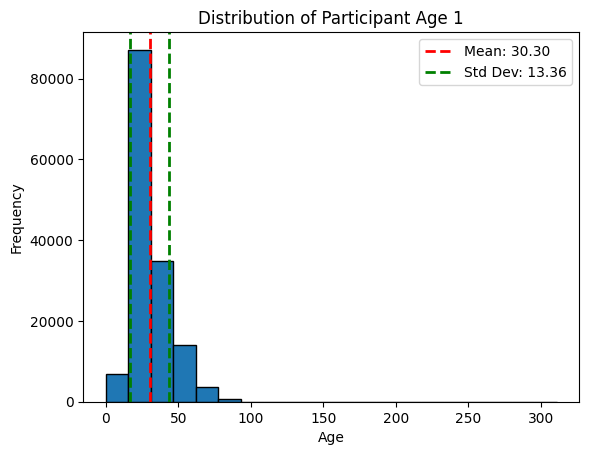

In [17]:
df_incidents['participant_age1'].value_counts().head(50)

#Show max participants_age1
df_incidents['participant_age1'].max()

#Show min participants_age1
#df_incidents['participant_age1'].min()
# Filter out missing or invalid values in 'participant_age1' (assuming it's numeric)
filtered_data = df_incidents['participant_age1'].dropna().astype(int)

# Calculate the mean and standard deviation
mean_age = np.mean(filtered_data)
std_dev_age = np.std(filtered_data)

# Create a histogram to visualize the distribution
plt.hist(filtered_data, bins=20, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Participant Age 1')

# Add mean and standard deviation to the plot
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
plt.axvline(mean_age + std_dev_age, color='green', linestyle='dashed', linewidth=2, label=f'Std Dev: {std_dev_age:.2f}')
plt.axvline(mean_age - std_dev_age, color='green', linestyle='dashed', linewidth=2)

plt.legend()  # Add a legend to the plot
plt.show()

Let's drop the records with NA value, excluding `partecipant_age1`:

In [18]:
columns_to_exclude = ['participant_age1']

# Create a new DataFrame with NaNs removed for all columns except 'participant_age1'
#df_incidents_nodup = df_incidents_nodup.dropna(subset=[col for col in df_incidents_nodup.columns if col not in columns_to_exclude])


In [20]:
# Create a copy of the DataFrame to avoid modifying the original
df_incidents_copy = df_incidents.copy()

# Create a dictionary to store the mode values for each 'participant_age_group1'
mode_dict = df_incidents_copy.groupby('participant_age_group1')['participant_age1'].apply(lambda x: x.mode().values[0]).to_dict()

# Define a function to fill missing values in 'participant_age1' based on 'participant_age_group1'
def fill_age_with_mode(row):
    if pd.isna(row['participant_age1']):
        return mode_dict.get(row['participant_age_group1'], row['participant_age1'])
    return row['participant_age1']

# Apply the function to create a new column 'filled_age1' with updated values
df_incidents_copy['filled_age1'] = df_incidents_copy.apply(fill_age_with_mode, axis=1)

In [22]:
# Remove NaNs

df_incidents_nodup.isna().sum()

#   Let's get the % of nans with respect to the total number of records, if is > 50% we drop the column

for col in df_incidents_copy.columns:
    pct_missing = np.mean(df_incidents_copy[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

    # drop if more than 50% of the data is missing
    if pct_missing > 0.5:
        df_incidents_copy.drop(col, axis=1, inplace=True)

# Finally deleting all NaNs
#df_incidents_nodup = df_incidents_nodup.dropna()

# Drop duplicates
df_incidents_nodup = df_incidents_copy.drop_duplicates()

date - 0%
state - 0%
city_or_county - 0%
latitude - 3%
longitude - 3%
congressional_district - 0%
state_house_district - 0%
state_senate_district - 0%
participant_age1 - 39%
participant_age_group1 - 18%
participant_gender1 - 15%
min_age_participants - 0%
avg_age_participants - 0%
max_age_participants - 0%
n_participants_child - 0%
n_participants_teen - 0%
n_participants_adult - 0%
n_males - 15%
n_females - 15%
n_killed - 0%
n_injured - 0%
n_arrested - 12%
n_unharmed - 12%
n_participants - 0%
year - 0%
filled_age1 - 17%


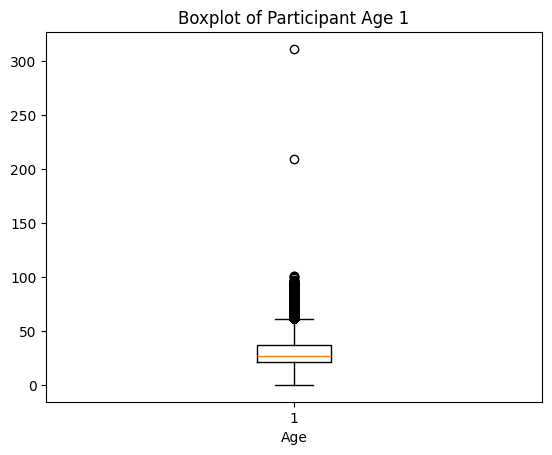

In [26]:
filtered_data = df_incidents_nodup['participant_age1'].dropna().astype(int)

# Create a boxplot to visualize the distribution
plt.boxplot(filtered_data, vert=True)  # vert=False makes it horizontal
plt.xlabel('Age')
plt.title('Boxplot of Participant Age 1')
plt.show()

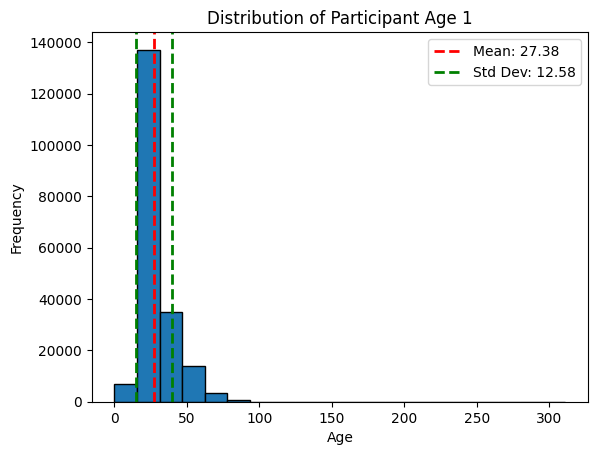

In [27]:
filtered_data = df_incidents_nodup['filled_age1'].dropna().astype(int)

# Calculate the mean and standard deviation
mean_age = np.mean(filtered_data)
std_dev_age = np.std(filtered_data)

# Create a histogram to visualize the distribution
plt.hist(filtered_data, bins=20, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Participant Age 1')

# Add mean and standard deviation to the plot
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
plt.axvline(mean_age + std_dev_age, color='green', linestyle='dashed', linewidth=2, label=f'Std Dev: {std_dev_age:.2f}')
plt.axvline(mean_age - std_dev_age, color='green', linestyle='dashed', linewidth=2)

plt.legend()  # Add a legend to the plot
plt.show()

In [ ]:


# boxplot of min_age_participants
df_incidents.boxplot(column=['min_age_participants'])

# Interestingly when you remove some wrong values or outliers you cant get different
# plot of other variables eg: this boxplot show clearly that age is 1e11, but if you remove some outlier then you get anomalous values around 300.

### 3.2 Mass Shooting #toreview

As we can see sometimes the number of people killed or injured it's not an incident it's a mass shooting

Let's remove this by taking into account this definition, given by FBI:

```
    The Federal Bureau of Investigation (FBI) defines a mass shooting as an incident in which four or more people, not including the shooter, are killed. This definition is often used in the United States.
```

In [ ]:

#visualize datapoint with more than 20 killed
df_incidents_nodup[df_incidents_nodup['n_killed'] > 20]

# summing n_males and females killed over a total participants score
df_incidents_nodup['n_participants'].sum()/(df_incidents_nodup['n_females'].sum()+df_incidents_nodup['n_males'].sum())

Removing also when `n_participants` is >= 5.
This will change the correlation matrix, try to remove this and see what happens

In [ ]:
# Let's visualize outliers with a boxplot


df_incidents_nodup.boxplot(column='n_killed')
df_incidents_nodup.boxplot(column='n_injured')

# Remove outliers if n_killed or n_injured > 4
df_incident_no_outliers = df_incidents_nodup[(df_incidents_nodup['n_killed'] < 4) & (df_incidents_nodup['n_injured'] < 4)]

# We have to remove when number of participants is more than 5 also
df_incident_no_outliers = df_incident_no_outliers[df_incident_no_outliers['n_participants'] < 5]


# 4. Outliers removal

In [ ]:
df_incident_no_outliers.boxplot(column=['n_killed', 'n_injured'])

### Remaining outliers check on the dataset

We will plot all the boxplot relative to the numerical features and check if there are some outliers

In [ ]:
# Plot different subplots of boxplot for each numerical column
import matplotlib.pyplot as plt

# get the numerical columns of the data frame
numerical_columns = df_incident_no_outliers.select_dtypes(include=['float64', 'int64']).columns

# create a boxplot for each numerical column
for column in numerical_columns:
    plt.figure()
    plt.boxplot(df_incident_no_outliers[column])
    plt.title(column)
    plt.show()

In [ ]:
df_incident_no_outliers.plot(kind='scatter', x='longitude', y='latitude')

# todo
Analyse the box-plot above respect to the outlier, distribution, standard deviation

### Some insights from outliers plot

How about the min, max ages and average? Why so hig? Let's check the data


In [ ]:
# Let's get hist of age min, max and avg

df_incident_no_outliers['avg_age_participants'].hist()
df_incident_no_outliers['min_age_participants'].hist()
df_incident_no_outliers['max_age_participants'].hist()



In [ ]:
# let's get the numerical max and mins
print("Absolute minimum age: ", df_incident_no_outliers['min_age_participants'].min())
print("Absolute maximum age: ", df_incident_no_outliers['max_age_participants'].max())

print("Minimum of max age: ", df_incident_no_outliers['max_age_participants'].min())
print("Maximum of max age: ", df_incident_no_outliers['max_age_participants'].max())

## Visualize Distributions

From the first we can see that plotting distirbution of n_killed against the number of incidents we can see that in the majority of the incidents people do not die. 

We have a distribution skewed to the left so the asimmetry index must be positive.

### Distribution of Killed People

In [ ]:
# Using seaborn to visualize the distribution of n_killed 

# In %
print((df_incident_no_outliers.groupby('n_killed').size()/len(df_incident_no_outliers)*100))

df_incident_no_outliers['n_killed'].value_counts().plot(kind='bar')

# PIE CHARTs ARE ILLEGAL
#df_incident_no_outliers['n_killed'].value_counts().plot(kind='pie')

# Asimmetry index is pos
skewness_n_killed = df_incident_no_outliers['n_killed'].skew()
print('\n\n',"Skewness of n_killed: %f" % skewness_n_killed)

### Distribution of Injured People

In [ ]:

# In %
print((df_incident_no_outliers.groupby('n_injured').size()/len(df_incident_no_outliers)*100))

df_incident_no_outliers['n_injured'].value_counts().plot(kind='bar')

# Asimmetry index is pos
skewness_n_injured = df_incident_no_outliers['n_injured'].skew()
print('\n\n',"Skewness of n_injured: %f" % skewness_n_injured)

# 5. Correlation analysis
Use the correlation coefficients to understand correlation between a set of attributes

### 5.1 Correlation on injured-killed

In [ ]:
#correlation injured and killed
corr_nk_ninj = df_incident_no_outliers['n_killed'].corr(df_incident_no_outliers['n_injured'])
print("Correlation between n_killed and n_injured: ", corr_nk_ninj)

# Visualizing ration of n_participants on female and male, usually these are almost the same number.
df_incident_no_outliers['n_participants'].sum()/(df_incident_no_outliers['n_females'].sum()+df_incident_no_outliers['n_males'].sum())

#### Correlation matrix of all our features [#WIP]()

#### Intresting correlations that can be inferred
-  `n_participants` and `n_males` is higly correlated: 0.83 (This will lower if we filter the `n_participants` > 5, still high tough)
-  `n_participants` and `n_females` is not: 0.36
- After converting some feature from object to int-float intresting correlation arises!

In [ ]:
# vector containig all numerical features
numerical_features = df_incident_no_outliers.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20, 16))  # Adjust the values (width, height) as needed
correlation_matrix_all = df_incident_no_outliers[numerical_features].corr()
sns.heatmap(correlation_matrix_all, annot=True)

# As for the correlation n_males & n_participants we can do statistical significance test, in our case the 
# null hypotesis is that the two variables are independent, we can reject the null hypotesis if the p-value is < 0.05

# Contigency table is used for categorical variable, so we can do a thing like this, take intervals 0-1 and 2-3 of participants
# and make this a categorical variable, then we can do a chi-square test

# adding low_participants column and high_participants column
# need to understand if this make sense or it's redundant.
df_incident_no_outliers['low_participants'] = df_incident_no_outliers['n_participants'].apply(lambda x: 1 if x < 2 else 0)
df_incident_no_outliers['high_participants'] = df_incident_no_outliers['n_participants'].apply(lambda x: 1 if x > 1 else 0)

# And now a little visualization of the chi2 test
# Visualize the result of the test
# print max vaues of n_participants


### Visualizing results of $\chi^2$ test

Wrote a little function that emulates how R show result of a statistical test


In [ ]:

from scipy.stats import chi2_contingency

# get contingency table
contingency_table = pd.crosstab(df_incident_no_outliers['n_males'], df_incident_no_outliers['n_participants'])

# perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table.values)

# Visualize the result of the test
# print max vaues of n_participants

# Heatmap of expected against observed frequencies
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6), sharey=True)

sns.heatmap(expected, annot=True, fmt='.2f', cmap='Blues', ax=ax1)
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Reds', ax=ax2)

ax1.set_xlabel('n_participants')
ax1.set_ylabel('n_males')
ax1.set_title('Expected Frequencies')

ax2.set_xlabel('n_participants')
ax2.set_title('Observed Frequencies')

plt.suptitle('Contingency Table with Expected Frequencies (Blue) and Observed Frequencies (Red)', fontsize=16)
plt.show()


In [ ]:
def print_chi2_results(chi2, p, dof, expected):
    print("Chi-squared test results:")
    print(f"  Chi-squared = {chi2:.20f}")
    print(f"  Degrees of freedom = {dof}")
    print(f"  p-value = {p:.20f}")
    print("  Expected frequencies:")
    for i in range(expected.shape[0]):
        for j in range(expected.shape[1]):
            print(f"    {contingency_table.index[i]} vs {contingency_table.columns[j]}: {expected[i][j]:.2f}")

In [ ]:
# Visualizing Chi2 #WIP
print_chi2_results(chi2, p, dof, expected)

### Age and Sex distributions

In [ ]:
# Print the number of incident of with males and femals plots

# Males incidents
df_incident_no_outliers['n_males'].value_counts().plot(kind='bar')

# Females incidents
df_incident_no_outliers['n_females'].value_counts().plot(kind='bar')


In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Plot the male incidents in the first subplot
df_incident_no_outliers['n_males'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_xlabel('Number of Males')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Male Victims in Gun Incidents')

# Plot the female incidents in the second subplot
df_incident_no_outliers['n_females'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_xlabel('Number of Females')
# Numer of incidents with particular numb of female and male
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Female Victims in Gun Incidents')

# Display the plot
plt.show()

## Distribution of death in each state 


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

#usa_map = gpd.read_file('../map_data/usa-states-census-2014.shp')

# use entire world map
usa_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# show map



usa_map.plot(figsize=(30,40))

# Draw red point for each latitude and longitude on df_incidents for 50 sampled incidents

sample_incidents = df_incidents_nodup.sample(len(df_incidents_nodup)//100)

for index, row in sample_incidents.iterrows():
    plt.plot(row['longitude'], row['latitude'], 'ro')
    

usa_map.head()


In [ ]:

len(df_incidents_nodup['state'].unique())
# We have 49 states in the data but there are 50, we lack Alaska and Hawaii american states why?

df_incidents_nodup['state'].unique()

In [ ]:
# Trying to plot a colormap or heatmap 

state_incidents = {}

usa_incidents_map = gpd.read_file('../map_data/usa-states-census-2014.shp')

# Counting the number of incidents per state
for state in sample_incidents['state'].unique():
    state_incidents[state] = len(sample_incidents[sample_incidents['state'] == state])


max_incidents = max(state_incidents.values())
min_incidents = min(state_incidents.values())

for state in state_incidents:
    state_incidents[state] = (state_incidents[state] - min_incidents) / (max_incidents - min_incidents)
    
# Convert in dataframe and divide key and value in two columns state and score
state_incidents_df = pd.DataFrame.from_dict(state_incidents, orient='index')
state_incidents_df.reset_index(inplace=True)
state_incidents_df.columns = ['state', 'score']


# histogram of the scores
# why 46? explore this
print(len(state_incidents_df['state'].unique()))
state_incidents_df['score'].plot(kind='hist', bins=len(state_incidents_df['state'].unique()))


# To get a color map we need to merge the map geometric data dataframe with state column (need to find or build it) with our dataset


# This is from sampled data, be careful! [#WIP]()

In [ ]:
#sample_incidents['city_or_county'].groupby(sample_incidents['state']).value_counts().plot(kind='bar')
sample_incidents['state'].value_counts().plot(kind='bar')
# omit x axis name
plt.xticks([])

state_incidents

In [ ]:
#sum arrested, injured, killed and compare to n_participants to a random record
sample_incidents['n_participants'] == sample_incidents['n_arrested'] + sample_incidents['n_injured'] + sample_incidents['n_killed']


#sample_incidents['n_participants'][88251] == sample_incidents['n_arrested'][88251] + sample_incidents['n_injured'][88251] + sample_incidents['n_killed'][88251]

In [ ]:
file_path = '../source/ds/incidents_taskDU.csv'
df_incident_no_outliers.to_csv(file_path, index=False)

print(f'Data saved to {file_path}')